In [1]:
# pip install trimesh

In [2]:
import os
import glob
import trimesh
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

tf.random.set_seed(1234)

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [9]:
import pandas as pd

In [10]:
data= pd.read_csv('1-1.csv')

In [11]:
data.head()

,Column1.1,Column1.2,Column1.3
0,0.000000,18.13588,0.4726
1,0.047290,18.13588,0.4672
2,0.094581,18.13588,0.4500
3,0.141871,18.13588,0.4253
4,0.189162,18.13588,0.4036


In [12]:
test1 = np.array(data)

In [13]:
test1

array([[ 0.      , 18.13588 ,  0.4726  ],
       [ 0.04729 , 18.13588 ,  0.4672  ],
       [ 0.094581, 18.13588 ,  0.45    ],
       ...,
       [24.118119,  0.      ,  0.3817  ],
       [24.16541 ,  0.      ,  0.3891  ],
       [24.189055,  0.      ,  0.3896  ]])

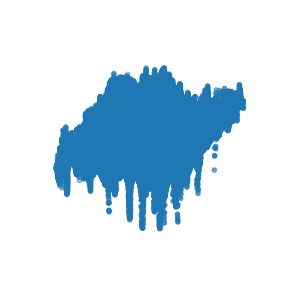

In [14]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(test1[:, 0], test1[:, 1], test1[:, 2])
ax.set_axis_off()
plt.show()

In [15]:
train_points = []
train_labels = []
class_map = {}
folders = glob.glob(os.path.join(DATA_DIR, "[!README]*"))

path = 'C:\\Upwork\\roughness Project'
files = glob.glob(path + '/*.csv', recursive = True)

In [16]:
folders

['C:\\Users\\DELL\\.keras\\datasets\\ModelNet10\\bathtub',
 'C:\\Users\\DELL\\.keras\\datasets\\ModelNet10\\bed',
 'C:\\Users\\DELL\\.keras\\datasets\\ModelNet10\\chair',
 'C:\\Users\\DELL\\.keras\\datasets\\ModelNet10\\night_stand',
 'C:\\Users\\DELL\\.keras\\datasets\\ModelNet10\\sofa',
 'C:\\Users\\DELL\\.keras\\datasets\\ModelNet10\\table',
 'C:\\Users\\DELL\\.keras\\datasets\\ModelNet10\\toilet']

In [17]:
    for i, folder in enumerate(folders):
        print("processing class: {}".format(os.path.basename(folder)))
        # store folder name with ID so we can retrieve later
        class_map[i] = folder.split("/")[-1]

processing class: bathtub
processing class: bed
processing class: chair
processing class: night_stand
processing class: sofa
processing class: table
processing class: toilet


In [18]:
files

['C:\\Upwork\\roughness Project\\1-1.csv',
 'C:\\Upwork\\roughness Project\\1-2.csv',
 'C:\\Upwork\\roughness Project\\1-3.csv',
 'C:\\Upwork\\roughness Project\\1-4.csv',
 'C:\\Upwork\\roughness Project\\1-5.csv',
 'C:\\Upwork\\roughness Project\\2-1.csv',
 'C:\\Upwork\\roughness Project\\2-2.csv',
 'C:\\Upwork\\roughness Project\\2-3.csv',
 'C:\\Upwork\\roughness Project\\2-4.csv',
 'C:\\Upwork\\roughness Project\\2-5.csv',
 'C:\\Upwork\\roughness Project\\3-1.csv',
 'C:\\Upwork\\roughness Project\\3-2.csv',
 'C:\\Upwork\\roughness Project\\3-3.csv',
 'C:\\Upwork\\roughness Project\\3-4.csv',
 'C:\\Upwork\\roughness Project\\3-5.csv']

In [19]:
# file.split('\\')[-1].split('-')[0]

In [20]:
data = {}
for i , file in enumerate(files) : 
    data[i] = pd.read_csv(file)

In [21]:
data.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [22]:
data[1]

,Column1.1,Column1.2,Column1.3
0,0.000000,18.13588,0.5101
1,0.047290,18.13588,0.5157
2,0.118226,18.13588,0.5312
3,0.165517,18.13588,0.5404
4,0.189162,18.13588,0.5422
...,...,...,...
137822,24.047184,0.00000,0.4901
137823,24.070829,0.00000,0.4865
137824,24.118119,0.00000,0.4809
137825,24.165410,0.00000,0.4779


In [23]:
for key in data.keys() : 
    data[key] = np.array(data[key])

In [24]:
data[1]

array([[ 0.      , 18.13588 ,  0.5101  ],
       [ 0.04729 , 18.13588 ,  0.5157  ],
       [ 0.118226, 18.13588 ,  0.5312  ],
       ...,
       [24.118119,  0.      ,  0.4809  ],
       [24.16541 ,  0.      ,  0.4779  ],
       [24.189055,  0.      ,  0.477   ]])

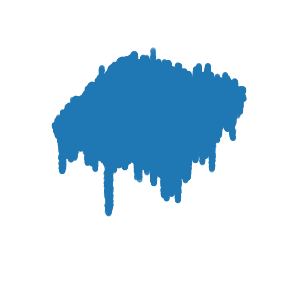

In [25]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data[10][:, 0], data[10][:, 1], data[10][:, 2])
ax.set_axis_off()
plt.show()

In [26]:
data.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [27]:
# def label (num) : 
#     if num >=0 and num <= 4 : 
#         return 1 
#     elif num >=5 and num <=9 : 
#         return 2 
#     elif num >=10 and num <=14 : 
#         return 3 
#     else :
#         return 'No Type'

In [28]:
# label(15)

In [29]:
# train_points = []
# train_labels = []

# for file in files :
#     if file.split('\\')[-1].split('-')[0] == '1' :
#         train_labels.append(1)
#     elif file.split('\\')[-1].split('-')[0] == '2' : 
#         train_labels.append(2) 
#     elif file.split('\\')[-1].split('-')[0] == '3' : 
#         train_labels.append(3)
#     else : 
#         print ('No Type')
# print (train_labels)
    

# Dealing With Test Data 

In [30]:
# pip install markupsafe==2.0.1

In [31]:
# pip install werkzeug==2.0.3

Note: you may need to restart the kernel to use updated packages.


In [33]:
# import cv2
# import numpy as np
# import open3d as o3d

# color = o3d.io.read_image("1-1.png")
# # depth = np.loadtxt("a542d.txt")

# vertices = []
# for x in range(depth.shape[0]):
#     for y in range(depth.shape[1]):
#         vertices.append((float(x), float(y)))
# pcd = o3d.geometry.PointCloud()
# point_cloud = np.asarray(np.array(vertices))
# pcd.points = o3d.utility.Vector3dVector(point_cloud)
# pcd.estimate_normals()
# pcd = pcd.normalize_normals()
# o3d.visualization.draw_geometries([pcd])

NameError: name 'depth' is not defined

In [154]:
def parse_dataset(num_points=2048):
    data = {}
    train_points = []
    train_labels = []
    for i , file in enumerate(files) :
        data[i] = pd.read_csv(file)
        data[i] = np.array(data[i])
        train_points.append(data[i][:num_points])
        label = file.split('\\')[-1].split('-')[0] 
        train_labels.append(int(label))
    return (
    np.array(train_points),
    np.array(train_labels),
    )

    # print(train_points)
    # print(train_labels)

    # type(train_points)
    # type(data[i])
    # train_labels

In [155]:
len(data[i][:2048])

2048

In [156]:
NUM_POINTS = 2048
NUM_CLASSES = 10
BATCH_SIZE = 32

train_points, train_labels = parse_dataset(
    NUM_POINTS
)

In [157]:
# def show_shapes(): # can make yours to take inputs; this'll use local variable values
#     print("Expected: (num_samples, timesteps, channels)")
#     print("train_points: {}".format(train_points.shape))
#     print("train_labels:   {}".format(train_labels.shape))  

In [158]:
# train_points = np.asarray(train_points)
# train_labels   = np.asarray(train_labels)
# show_shapes()

# train_points = np.expand_dims(train_points, -1)
# train_labels   = np.expand_dims(train_labels, -1)
# show_shapes()

In [159]:
type(train_points)

numpy.ndarray

In [160]:
type(train_labels)

numpy.ndarray

In [161]:
# train_points = np.array(train_points)
# train_labels = np.array(train_labels)

In [162]:
# train_labels= np.asarray(train_labels).astype(np.float32)

In [163]:
type(train_labels)

numpy.ndarray

In [164]:
def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label


train_dataset = tf.data.Dataset.from_tensor_slices((train_points, train_labels))
train_dataset = train_dataset.shuffle(len(train_points)).map(augment).batch(BATCH_SIZE)


In [165]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 2048, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Building Model 

In [166]:
def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)

In [167]:
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))

In [168]:
def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [169]:
inputs = keras.Input(shape=(NUM_POINTS, 3))
x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_57 (Conv1D)             (None, 2048, 32)     128         ['input_9[0][0]']                
                                                                                                  
 batch_normalization_85 (BatchN  (None, 2048, 32)    128         ['conv1d_57[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 2048, 32)     0           ['batch_normalization_85[0

 activation_94 (Activation)     (None, 2048, 512)    0           ['batch_normalization_94[0][0]'] 
                                                                                                  
 global_max_pooling1d_16 (Globa  (None, 512)         0           ['activation_94[0][0]']          
 lMaxPooling1D)                                                                                   
                                                                                                  
 dense_48 (Dense)               (None, 256)          131328      ['global_max_pooling1d_16[0][0]']
                                                                                                  
 batch_normalization_95 (BatchN  (None, 256)         1024        ['dense_48[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 activatio

In [170]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)


In [171]:
model.fit(train_dataset, epochs=20)

Epoch 1/20
1/1 [==============================] - 8s 8s/step - loss: 3.6584 - sparse_categorical_accuracy: 0.2667
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 3.6532 - sparse_categorical_accuracy: 0.2667
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 3.3183 - sparse_categorical_accuracy: 0.2000
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 3.2357 - sparse_categorical_accuracy: 0.3333
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 2.8937 - sparse_categorical_accuracy: 0.4000
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 2.6984 - sparse_categorical_accuracy: 0.6000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 2.4881 - sparse_categorical_accuracy: 0.6667
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: 2.2303 - sparse_categorical_accuracy: 0.7333
Epoch 9/20
1/1 [==============================] - 2s 2s/step - loss: 2.1077 - sparse_cat